In [1]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split
# from sklearn.datasets import load_breast_cancer
# from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
%matplotlib inline

# sns.set_style('darkgrid')
pd.set_option('display.max_columns', None)

In [2]:
## read the data file

df = pd.read_csv('heart.csv')

In [3]:
## display first five row of data 

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


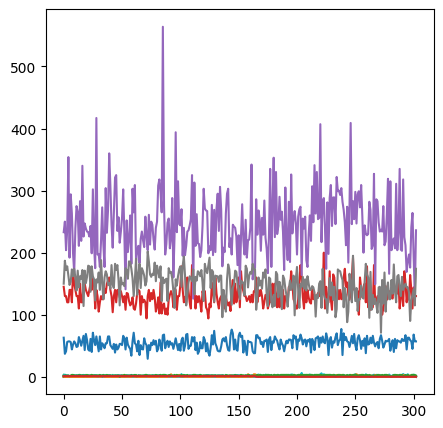

In [4]:
## value counts of column age

plt.figure(figsize=(5, 5))
plt.plot(df)
# sns.countplot(x='sex', data=df);

<Figure size 500x500 with 0 Axes>

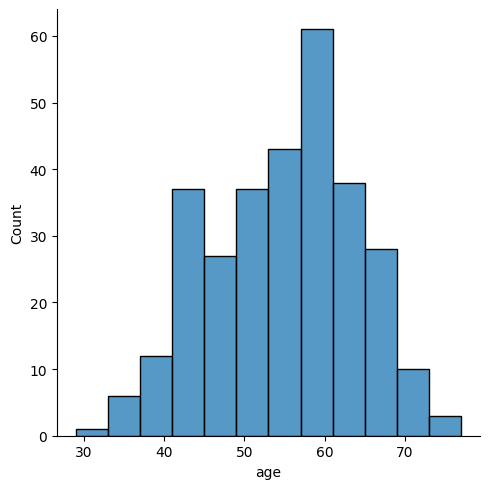

In [5]:
## distribution plot of column age

plt.figure(figsize=(5, 5));
sns.displot(df['age']);

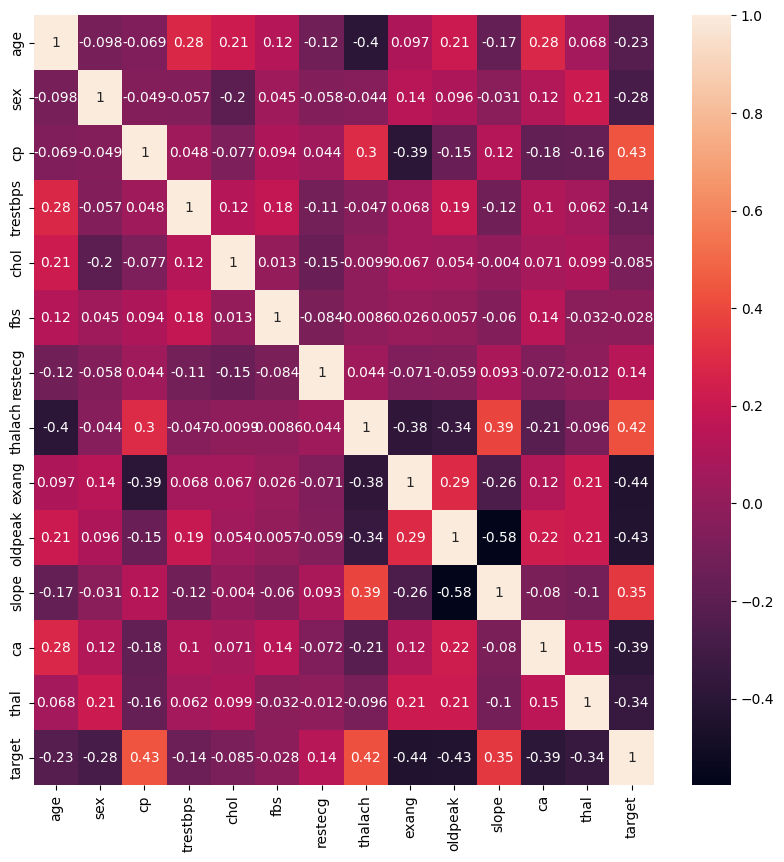

In [6]:
## correlation of features

plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True);

In [7]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


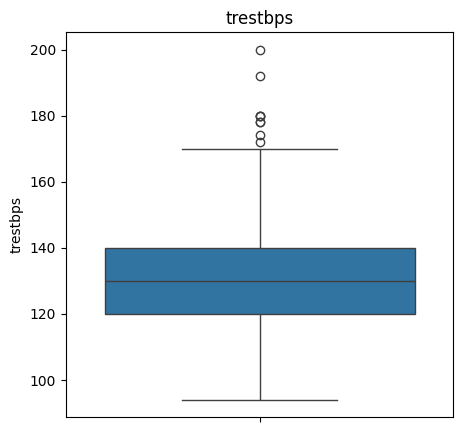

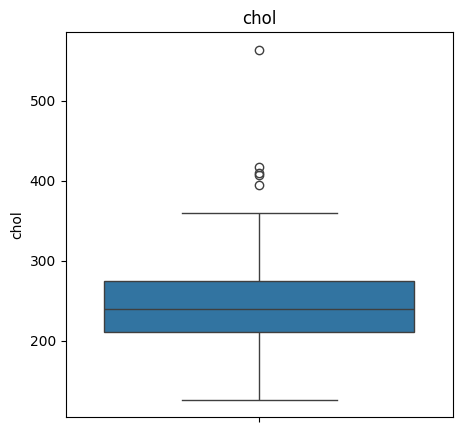

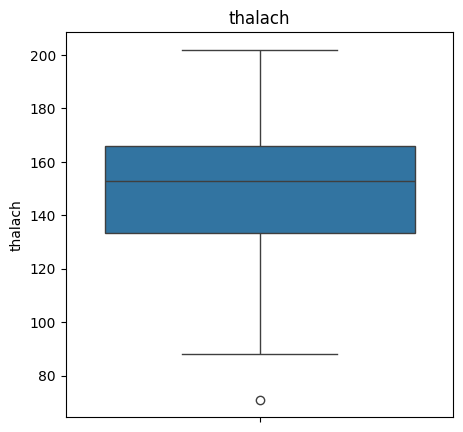

In [8]:
## checking outliers

for f in ['trestbps', 'chol', 'thalach']:
    plt.figure(figsize=(5, 5))
    sns.boxplot(df[f])
    plt.title(f)

<Figure size 500x500 with 0 Axes>

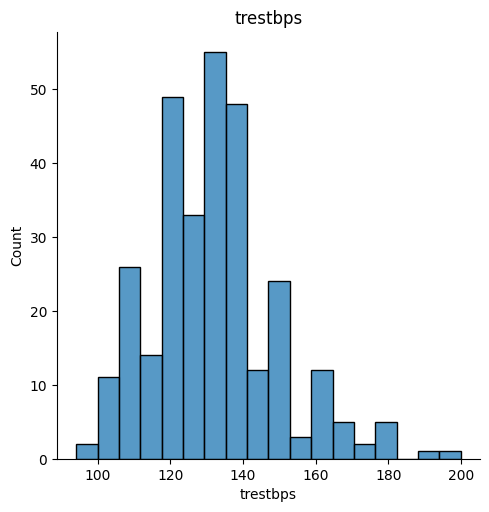

<Figure size 500x500 with 0 Axes>

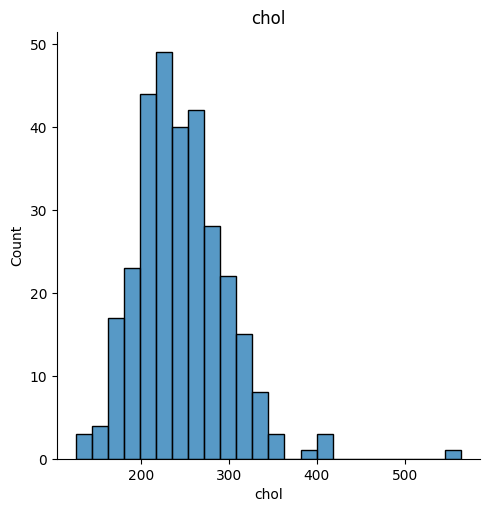

<Figure size 500x500 with 0 Axes>

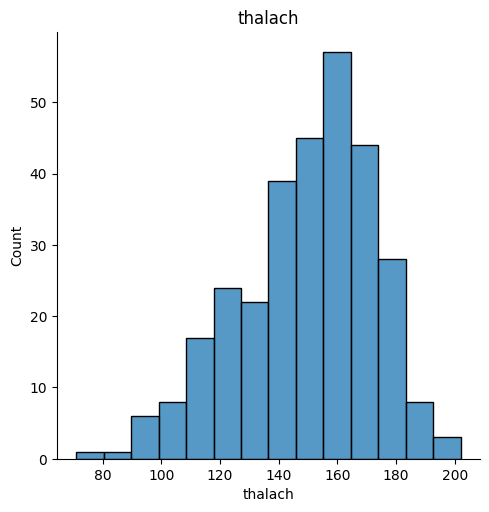

In [9]:
for f in ['trestbps', 'chol', 'thalach']:
    plt.figure(figsize=(5, 5))
    sns.displot(df[f])
    plt.title(f)

In [10]:
##  we are going to remove outliers with 3rd std

def remove_outliers(df, feature):
    lower_bound = df[feature].mean() - (3 * df[feature].std())
    upper_bound = df[feature].mean() + (3 * df[feature].std())
    
    df.loc[df[feature] < lower_bound, feature] = lower_bound
    df.loc[df[feature] > upper_bound, feature] = upper_bound

In [11]:
for f in ['trestbps', 'chol', 'thalach', 'age']:
    remove_outliers(df, f)

C:\Users\velud\AppData\Local\Temp\ipykernel_15180\2196426775.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '79.00933393568633' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[feature] < lower_bound, feature] = lower_bound
C:\Users\velud\AppData\Local\Temp\ipykernel_15180\2196426775.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '90.77177343885018' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[feature] < lower_bound, feature] = lower_bound
C:\Users\velud\AppData\Local\Temp\ipykernel_15180\2196426775.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '80.93138134172638' has dtype incompatible with int64, please explicitly cast to a 

In [12]:
# for f in ['trestbps', 'chol', 'thalach']:
#     plt.figure(figsize=(5, 5))
#     sns.boxplot(df[f])
#     plt.title(f)

Text(0.5, 1.0, 'age')

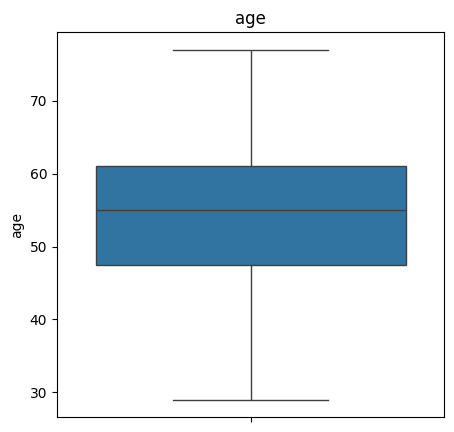

In [13]:
remove_outliers(df, 'age')
plt.figure(figsize=(5, 5))
sns.boxplot(df['age'])
plt.title('age')

In [14]:
# ## dependent and independent features

# X = df.iloc[:, :-1]
# y = df.iloc[:, -1]

# ## converting X and y into numpy array's

# X = X.values
# y = y.values

In [15]:
X=df.drop(columns=['target'])
y=df['target']

In [16]:
## scaling the data 

sc = StandardScaler()
X = sc.fit_transform(X)

In [17]:
## splitting the dataset into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [18]:
## logistic Regression

lg = LogisticRegression()

In [19]:
lg.fit(X_train, y_train)

LogisticRegression()

In [20]:
preds = lg.predict(X_test)
pd.DataFrame({'Acutual': y_test, 'Predicted': preds})

,Acutual,Predicted
179,0,0
228,0,1
111,1,1
246,0,0
60,1,1
...,...,...
22,1,1
258,0,1
56,1,1
242,0,0


------------------------------------------------Accuracy Score-------------------------------------------------------
84.21052631578947
------------------------------------------Classfication Report--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.80      0.82        35
           1       0.84      0.88      0.86        41

    accuracy                           0.84        76
   macro avg       0.84      0.84      0.84        76
weighted avg       0.84      0.84      0.84        76

----------------------------------------------------------Confusion Matrix---------------------------------------------


<Axes: >

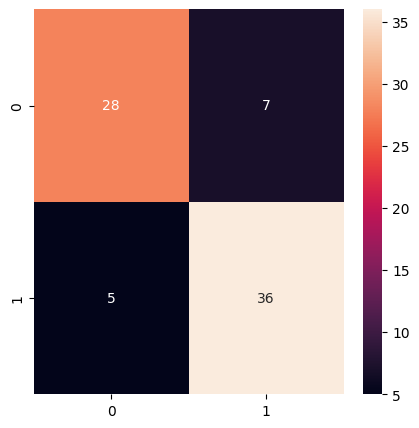

In [21]:
print("------------------------------------------------Accuracy Score-------------------------------------------------------")
print(accuracy_score(y_test, preds)*100)

print("------------------------------------------Classfication Report--------------------------------------------------------")
print(classification_report(y_test, preds))

print("----------------------------------------------------------Confusion Matrix---------------------------------------------")
plt.figure(figsize=(5, 5))
sns.heatmap(confusion_matrix(y_test, preds), annot=True)

In [22]:
from sklearn.svm import SVC

In [23]:
svm_model = SVC(kernel='linear', C=1.0,random_state=42)
svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [24]:
pred = svm_model.predict(X_test)

In [25]:
pd.DataFrame({'Acutual': y_test, 'Predicted': pred})

,Acutual,Predicted
179,0,0
228,0,1
111,1,1
246,0,0
60,1,1
...,...,...
22,1,1
258,0,1
56,1,1
242,0,0


------------------------------------------------Accuracy Score-------------------------------------------------------
85.52631578947368
------------------------------------------Classfication Report--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.80      0.84        35
           1       0.84      0.90      0.87        41

    accuracy                           0.86        76
   macro avg       0.86      0.85      0.85        76
weighted avg       0.86      0.86      0.85        76

----------------------------------------------------------Confusion Matrix---------------------------------------------


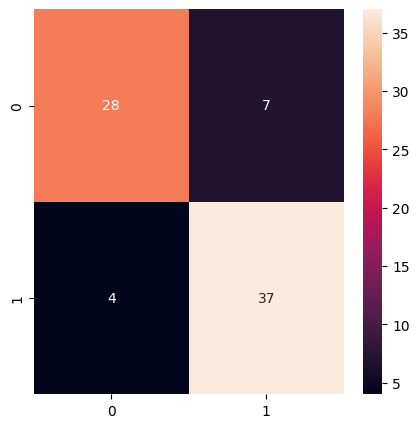

In [26]:
print("------------------------------------------------Accuracy Score-------------------------------------------------------")
print(accuracy_score(y_test, pred)*100)

print("------------------------------------------Classfication Report--------------------------------------------------------")
print(classification_report(y_test, pred))

print("----------------------------------------------------------Confusion Matrix---------------------------------------------")
plt.figure(figsize=(5, 5))
sns.heatmap(confusion_matrix(y_test, pred), annot=True);

In [27]:
#import joblib
import pickle

In [28]:
#joblib.dump(svm_model, 'svm_model.pkl')
pickle.dump(svm_model,open('svm_model1.pkl','wb'))

In [29]:
#model=joblib.load('svm_model.pkl')
model = pickle.load(open('svm_model1.pkl', 'rb'))

In [30]:
predc=model.predict([[52,1,3,118,186,0,0,190,0,0,1,0,1]])

In [31]:
predc

array([1], dtype=int64)